In [1]:
import pickle
import sys
sys.path.insert(0,'./src/')
from pipe import *
from utils import *
from matplotlib import pyplot as plt

In [2]:
scale = 4

In [13]:
l1 = pt(-5,0)
l2 = pt(4,-3)
l3 = pt(4,3)
ls = np.array([l1,l2,l3])/scale
rs = np.array([1,1,1])/scale
pipe = NLets(ls,rs)
shift1 = np.array([0,0])

In [14]:
pipe.build()

In [16]:
with open('temp.pickle','wb') as f:
    pickle.dump(pipe,f)

In [18]:
pipe.A = None

In [19]:
with open('temp.pickle','wb') as f:
    pickle.dump(pipe,f)

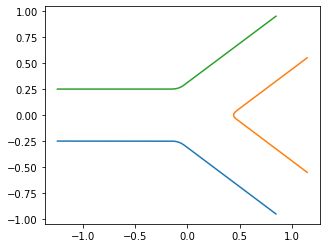

In [17]:
fig, ax = plt.subplots()
for bdr in pipe.open_bdr:
    ax.plot(*bdr.T)
ax.set_aspect('equal')

In [10]:
pipe.build_plotting_data(density=50,h_mult=4)

In [11]:
t = pipe.t
x = t.real
y = t.imag
xs = pipe.xs
ys = pipe.ys

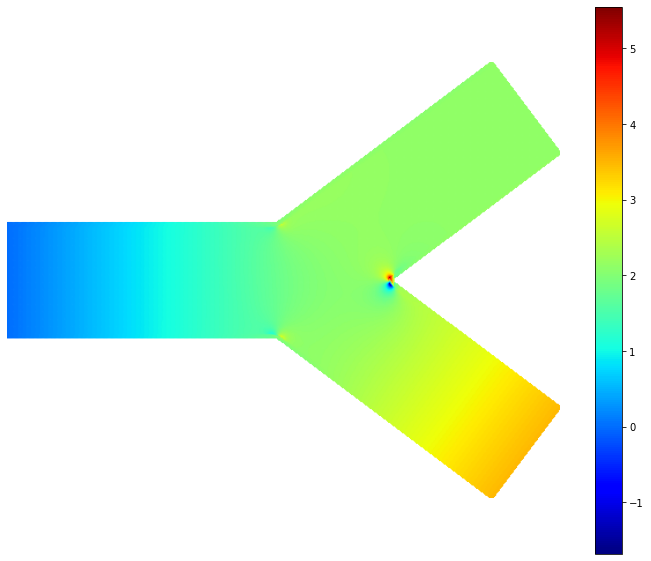

In [13]:
l,r,u,b = pipe.extent
fig, ax = plt.subplots(figsize=((r-l),(b-u)))
ax.set_aspect('equal')
im = ax.scatter(pipe.xs,pipe.ys,c=pipe.pressure_fields[0],s=1,cmap='jet')
# ax.scatter(xs[nearboundary],ys[nearboundary],c=u,s=0.8,vmin=vmin,vmax=vmax)
# im = ax.scatter(xs[nearboundary][np.isnan(u)],ys[nearboundary][np.isnan(u)],c=u2,s=0.8,vmin=vmin,vmax=vmax)
# ax.scatter(x,y,c='black',s=.1)
fig.colorbar(im)
ax.set_axis_off()
ax.margins(0)
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

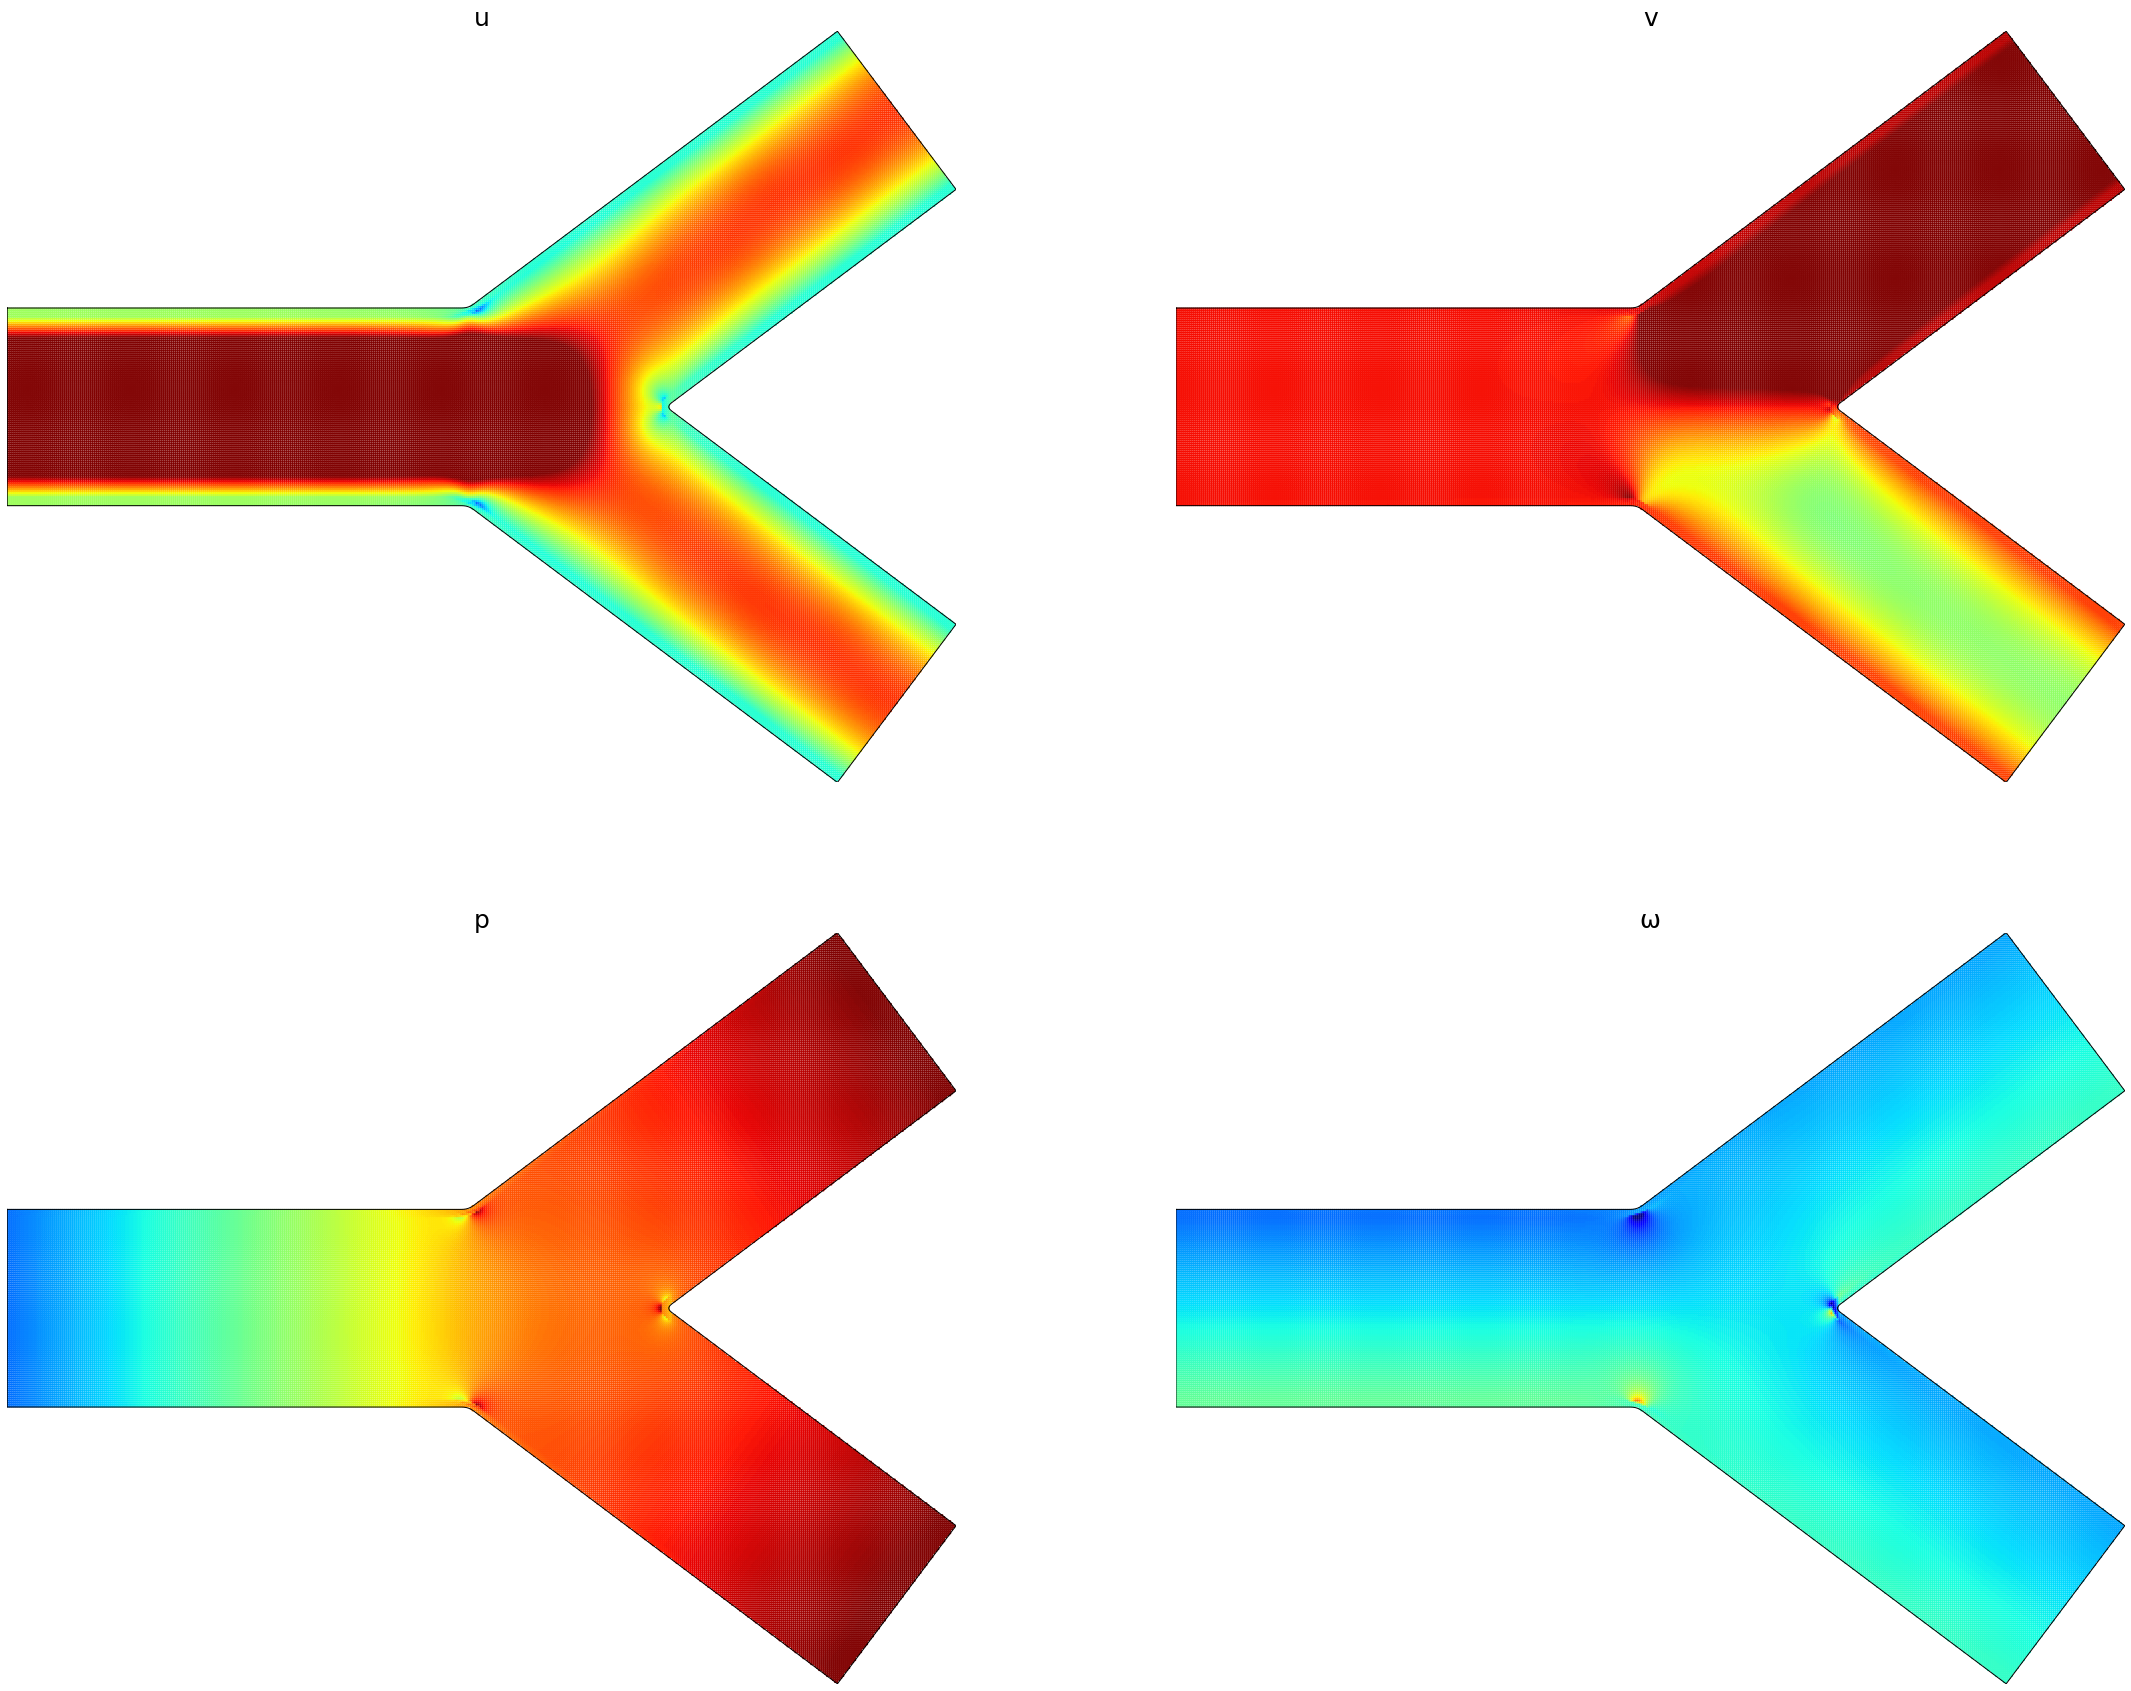

In [14]:
fig,axes = plt.subplots(2,2,figsize=(4*(r-l),4*(b-u)))
for ax,fields,name in zip(axes.flatten(),(pipe.u_fields,pipe.v_fields,pipe.pressure_fields,pipe.vorticity_fields),'uvpω'):
    ax.set_aspect('equal')
    ax.scatter(pipe.xs,pipe.ys,c=fields[0] + fields[1],s=2,cmap='jet', vmin=np.min(fields[0]),vmax=np.max(fields[0]))
    ax.plot(*(pipe.closed_boundary.T),c='black',linewidth=1)
    ax.title.set_text(name)
    ax.title.set_fontsize(25)
    ax.set_axis_off()
    ax.margins(0)

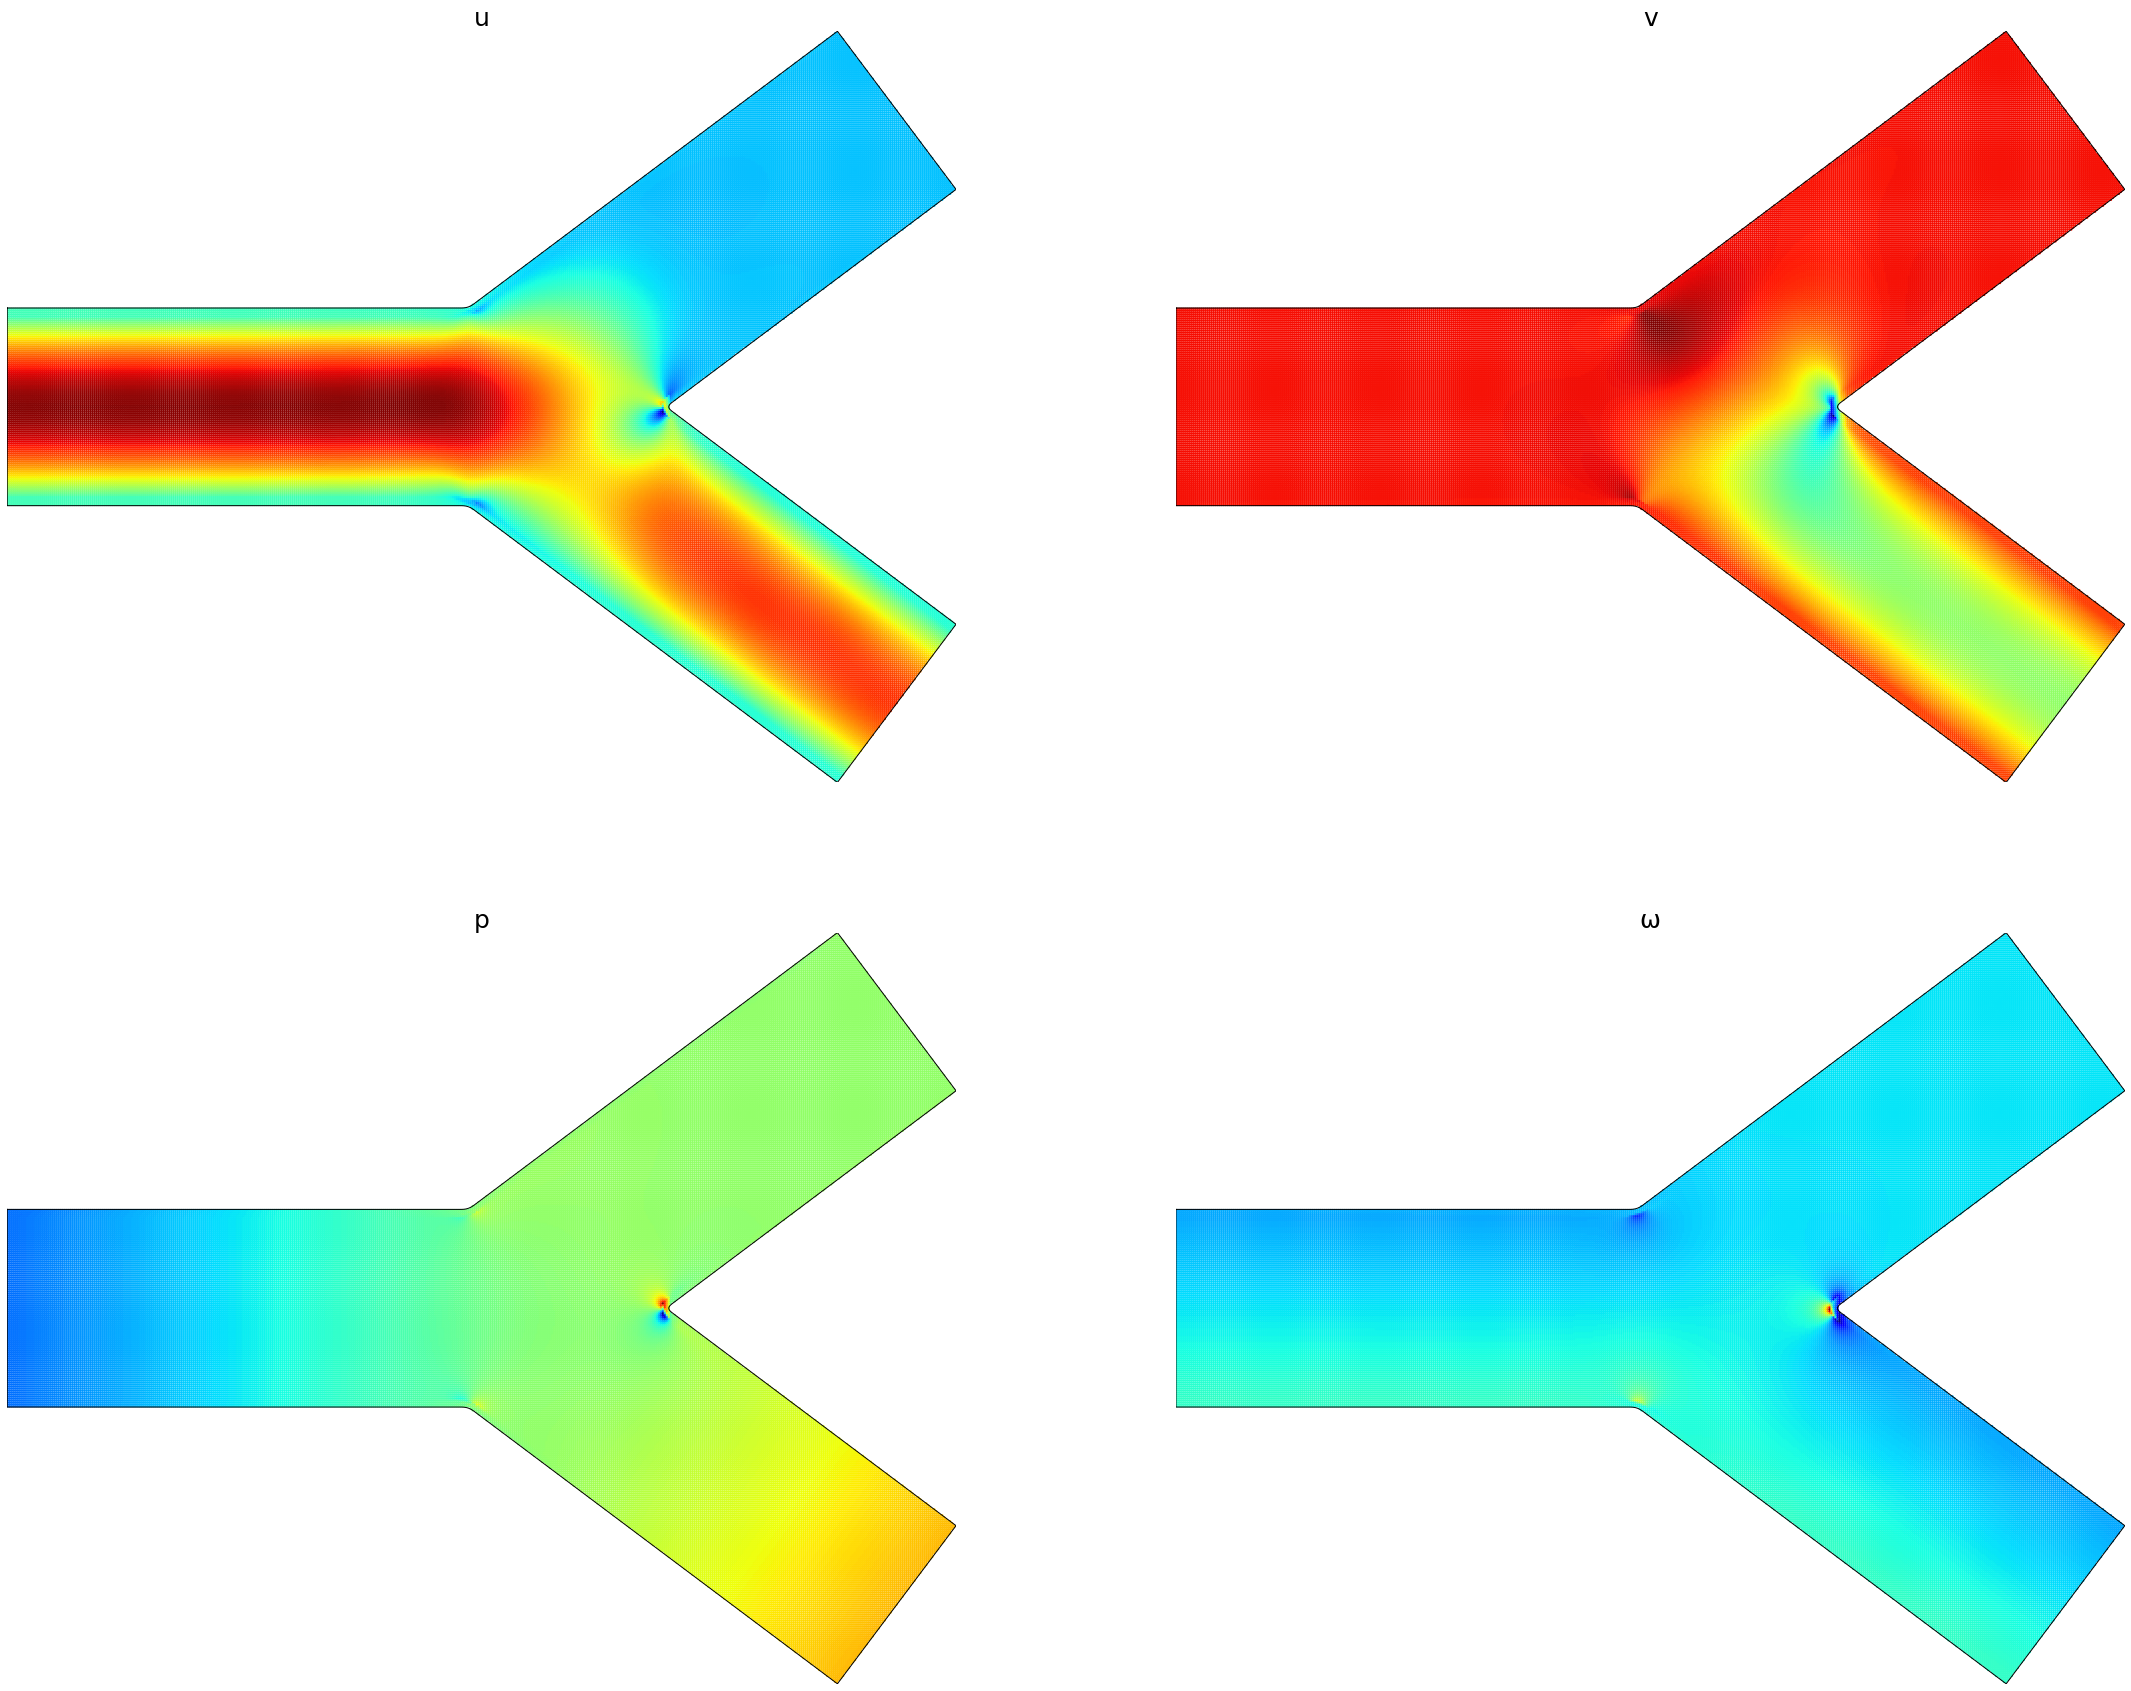

In [17]:
fig,axes = plt.subplots(2,2,figsize=(4*(r-l),4*(b-u)))
for ax,fields,name in zip(axes.flatten(),(pipe.u_fields,pipe.v_fields,pipe.pressure_fields,pipe.vorticity_fields),'uvpω'):
    ax.set_aspect('equal')
    ax.scatter(pipe.xs,pipe.ys,c=fields[0],s=2,cmap='jet', vmin=np.min(fields[0]),vmax=np.max(fields[0]))
    ax.plot(*(pipe.closed_boundary.T),c='black',linewidth=1)
    ax.title.set_text(name)
    ax.title.set_fontsize(25)
    ax.set_axis_off()
    ax.margins(0)